# 비전공자를 위한 AI 딥러닝(Deep Learning)


#회귀분석
####  $$ E = \frac{1}{m} \sum_{k=0}^{m} (\hat{y}_m - y_m)^2 $$

 Latex 작성법 논문 작성을 위해서 언젠가는 배워야 한다고 생각했는데 바로 지금이다
 회귀분석 처음에는 데이터셋으로 하려고 했는데 생각보다 만지기 까다로워서 우선은 내가 직접 구현
 어차피 회귀분석 할 일은 많고 내가 데이터 만들고 해보는것도 나쁘지 않지
 

Intercept와 Coefficient: [[3.95840198]
 [3.00069298]]
새로운 데이터에 대한 예측: [[3.95840198]
 [9.95978794]]


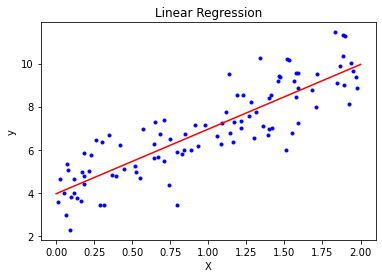

In [1]:
import numpy as np
import matplotlib.pyplot as plt   

#실습때 연습하기는 했는데 그래도 뭔가 좋은 코드가 어떤건지 보고 싶어 gpt의 힘을 빌려서 봤다.(
#내가 직접 구현하려고 했는데 데이터 생성이랑 절편(insert 함수를 썼는데 지정분 정규방정식 구현부터 막히더라 결국 gpt의 힘을..

# 데이터 생성
#np.random.seed(0) 
X = 2 * np.random.rand(100, 1)  # 0에서 2까지의 난수데이터를 100개 만들어보자!
y = 4 + 3 * X + np.random.randn(100, 1)  #회괴분석 구현 Y = 3X + 4 + e

# X에 절편(intercept)을 추가
X_b = np.c_[np.ones((100, 1)), X]  # X절편을 추가하는 것 np.c 함수 연습하기  이 과정이 필요한 이유는 수학으로 치면 y= b0 + b1
 
# 정규 방정식을 사용하여 theta 계산
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #liang.inv 이게 기억이 안 나서..

# theta_best 출력
print("Intercept와 Coefficient:", theta_best)

# 새로운 데이터에 대한 예측
X_new = np.array([[0], [2]]) #★ 아 뭐지 이거 리스타아닌가?  싶었느데 이렇게 하나는 정수로 취급인가 신기하네
X_new_b = np.c_[np.ones((2, 1)), X_new]  #  절편추가
y_predict = X_new_b.dot(theta_best)
print("새로운 데이터에 대한 예측:", y_predict)

# 데이터 시각화
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-") #이게 왜 선인지지 했는데 - 이게 선이구나 그동안 시각화 하면서 왜 몰랐지?
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()

# 사족


In [2]:
import numpy as np

# 예제 배열 생성
a = np.array([[1, 2, 3], [7, 8, 9]])
b = np.array([[4, 5, 6], [10, 11, 12]])

# np.c_를 사용하여 열로 배열 합치기
result_c = np.c_[a, b]
result_r = np.r_[a, b]

print(result_c)
print("★")
print(result_r)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
★
[[ 1  2  3]
 [ 7  8  9]
 [ 4  5  6]
 [10 11 12]]


# Mnist

텐서플로우 import 이 안 되어서 포기하려다가 그냥 torch로 도전!
실패..
그냥 여러가지 메모 남겨놓는데 의미를 두자

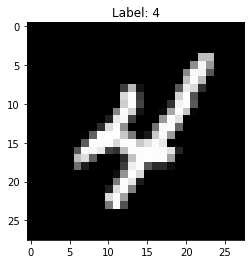

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

#첫 번째 이미지와 레이블 확인
image, label = train_dataset[9]
plt.imshow(image.squeeze(), cmap='gray') # 시각화를 위해서 squeeze로 불필요한 차원 제거
plt.title(f'Label: {label}')
#plt.axis('off')
plt.show()


In [4]:
print(  train_dataset)  # 훈련 데이터셋의 샘플 개수 출력
print(len(train_dataset))  # 훈련 데이터셋의 샘플 개수 출력
sample_image, sample_label = train_dataset[0]
print("★")
print(sample_image.shape)  # 이미지의 형태 출력
print(sample_label)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
60000
★
torch.Size([1, 28, 28])
5


In [ ]:

# 훈련 데이터셋의 이미지와 레이블 분리
x_train = []
y_train = []
for image, label in train_dataset:
    x_train.append(image)
    y_train.append(label)

# 첫 번째 이미지와 레이블 확인
first_image = x_train[0].squeeze()  # squeeze()로 불필요한 차원 제거
first_label = y_train[0]

plt.imshow(first_image, cmap='gray')
plt.title(f'Label: {first_label}')
plt.axis('off')  # 축 숨기기
plt.show()

 

In [ ]:
print(x_train[5])
print(y_train[5])
 
first_image = x_train[5].squeeze()  # squeeze()로 불필요한 차원 제거

plt.imshow(first_image, cmap='gray')


In [ ]:
print(x_train[0].shape)
 